# Análisis Exploratorio de Datos

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# split para modelado
from sklearn.model_selection import train_test_split
# Scaled | Escalado
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Encoding | Codificación
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
# To save models
import json
import pickle
# Feature Selection
from sklearn.feature_selection import f_classif, SelectKBest


**Cargo el dataset como DataFrame**

EDA

In [102]:
train_data = pd.read_csv("../data/raw/internal-link.csv")

df = pd.concat([train_data]).reset_index(inplace=False)
df.drop(columns=["index"], inplace=True)
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


**Comenzamos a ver que tipo de (Dtype) temos**

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [104]:
df.shape

(48895, 16)

In [105]:
df = df.loc[df['price'] > 0] #Elimino precios de 0

In [106]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48884.0,1.901679e+07,1.098432e+07,2539.00000,9.470548e+06,1.967574e+07,2.915297e+07,3.648724e+07
host_id,48884.0,6.762203e+07,7.861666e+07,2438.00000,7.817310e+06,3.079257e+07,1.074344e+08,2.743213e+08
latitude,48884.0,4.072895e+01,5.453177e-02,40.49979,4.069010e+01,4.072308e+01,4.076312e+01,4.091306e+01
longitude,48884.0,-7.395218e+01,4.615874e-02,-74.24442,-7.398308e+01,-7.395569e+01,-7.393629e+01,-7.371299e+01
price,48884.0,1.527551e+02,2.401703e+02,10.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48884.0,7.029887e+00,2.051222e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48884.0,2.327199e+01,4.455133e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38833.0,1.373128e+00,1.680391e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48884.0,7.144628e+00,3.295619e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48884.0,1.127795e+02,1.316273e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


Observaciones:

>
> - Existen 48895 filas (Clientes) 16 Columnas con información: nombre, precio por noche, lugar, tipo de airbnb, etc...
> - La variable reviews_per_month contiene 38843 valores, por lo cual tiene menos 10000 valores (Reviews) 


## Limpieza de Datos

In [107]:
df.replace([np.inf, -np.inf], np.nan, inplace=True) 

df.dropna(inplace=True) #Elimino los valores nulos/NaN

In [108]:
df.duplicated() #Reviso si hay valores duplicados

0        False
1        False
3        False
4        False
5        False
         ...  
48782    False
48790    False
48799    False
48805    False
48852    False
Length: 38811, dtype: bool

In [109]:
df.drop("id", axis=1).duplicated().sum()

np.int64(0)

No encontramos ningún valor duplicado

## Elimino las variables irrelevantes

In [110]:
df.drop(['name','id','host_id','last_review','host_name'], axis=1, inplace=True)
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
5,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129


## Análisis de Variables


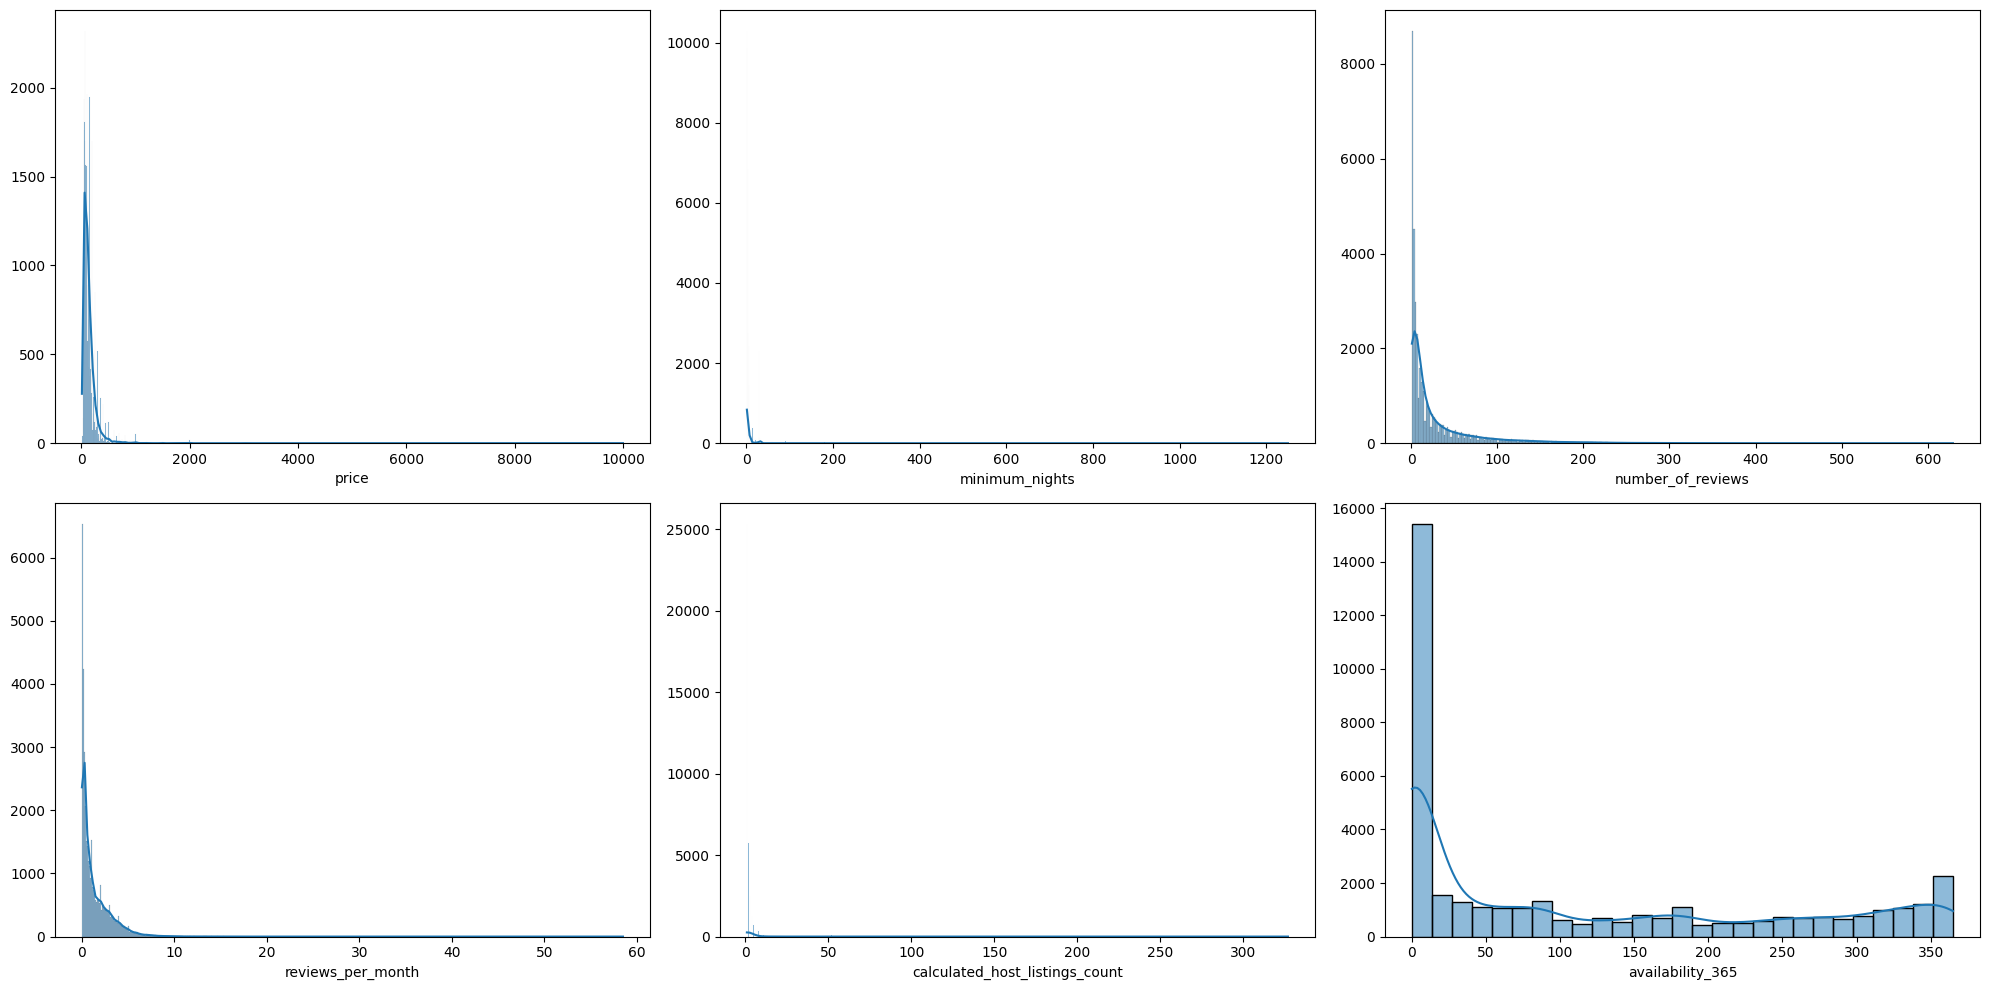

In [111]:
figs, axis = plt.subplots(2, 3, figsize=(20, 10))

sns.histplot(ax=axis[0, 0], data=df, x='price', kde=True).set(ylabel=None)
sns.histplot(ax=axis[0, 1], data=df, x='minimum_nights', kde=True).set(ylabel=None)
sns.histplot(ax=axis[0, 2], data=df, x='number_of_reviews', kde=True).set(ylabel=None)
sns.histplot(ax=axis[1, 0], data=df, x='reviews_per_month', kde=True).set(ylabel=None)
sns.histplot(ax=axis[1, 1], data=df, x='calculated_host_listings_count', kde=True).set(ylabel=None)
sns.histplot(ax=axis[1, 2], data=df, x='availability_365', kde=True).set(ylabel=None)

plt.tight_layout()
plt.show()

#### Análisis de Variables Univariante Numéricas


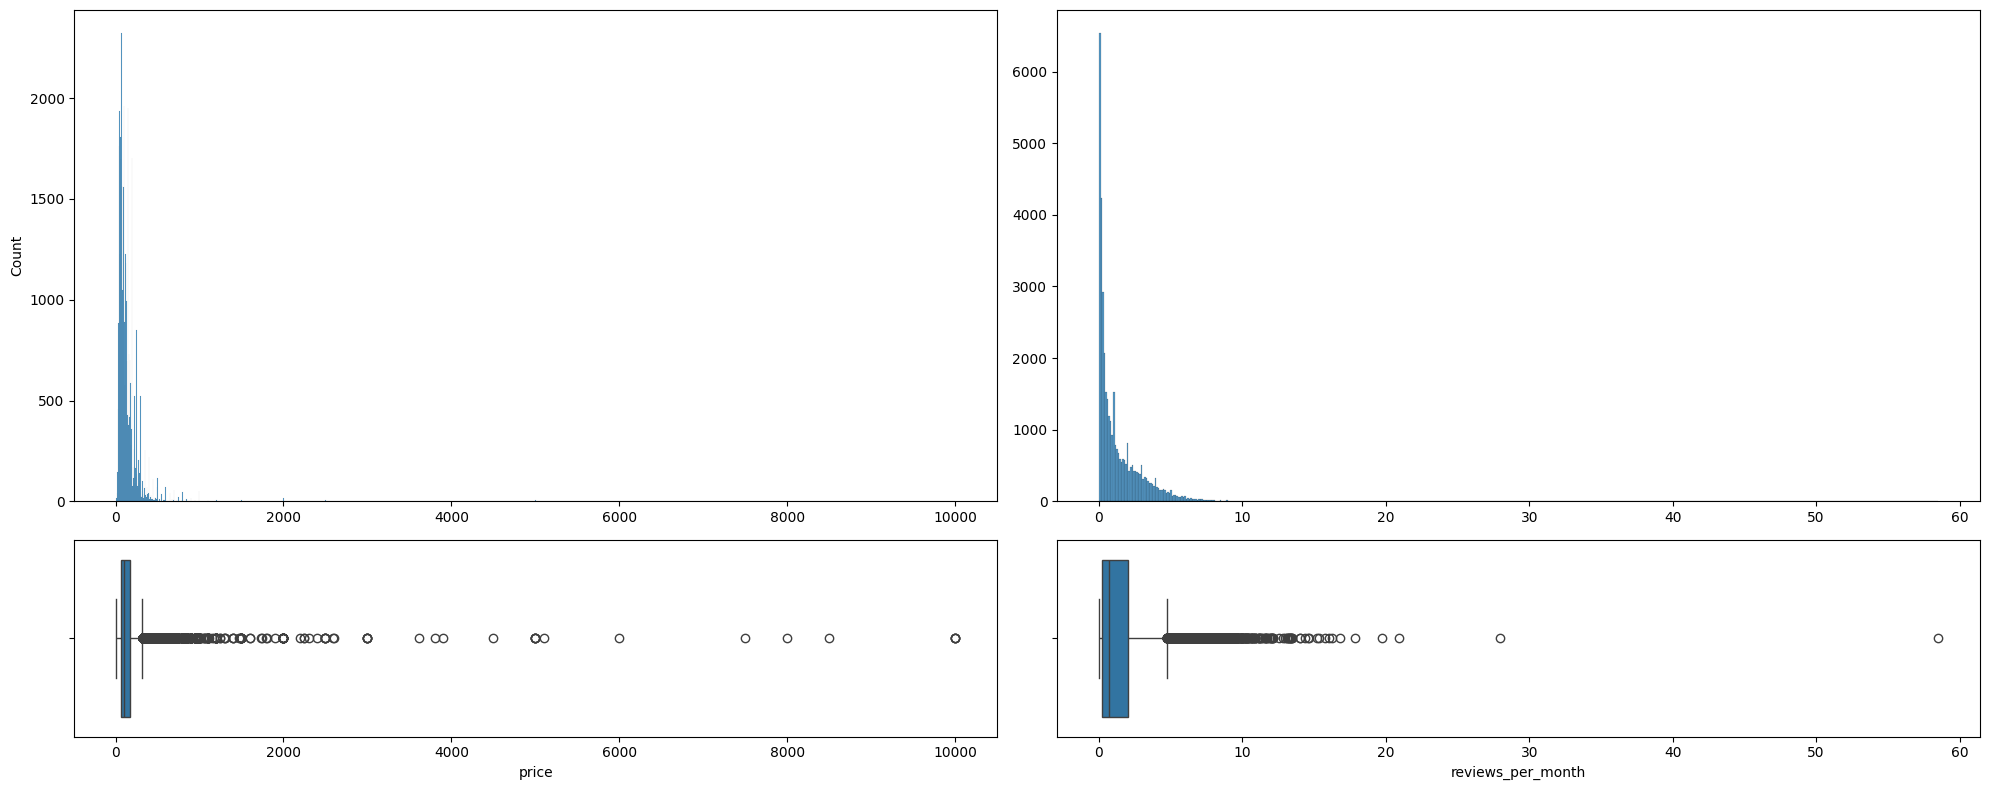

In [112]:
fig, axis = plt.subplots(2, 2, figsize=(20, 8), gridspec_kw={'height_ratios': [10, 4]})

sns.histplot(ax=axis[0, 0], data=df, x="price").set(xlabel=None)
sns.boxplot(ax=axis[1, 0], data=df, x="price")
sns.histplot(ax=axis[0, 1], data=df, x="reviews_per_month").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 1], data=df, x="reviews_per_month")

plt.tight_layout()
plt.show()

## Generamos las correlaciones

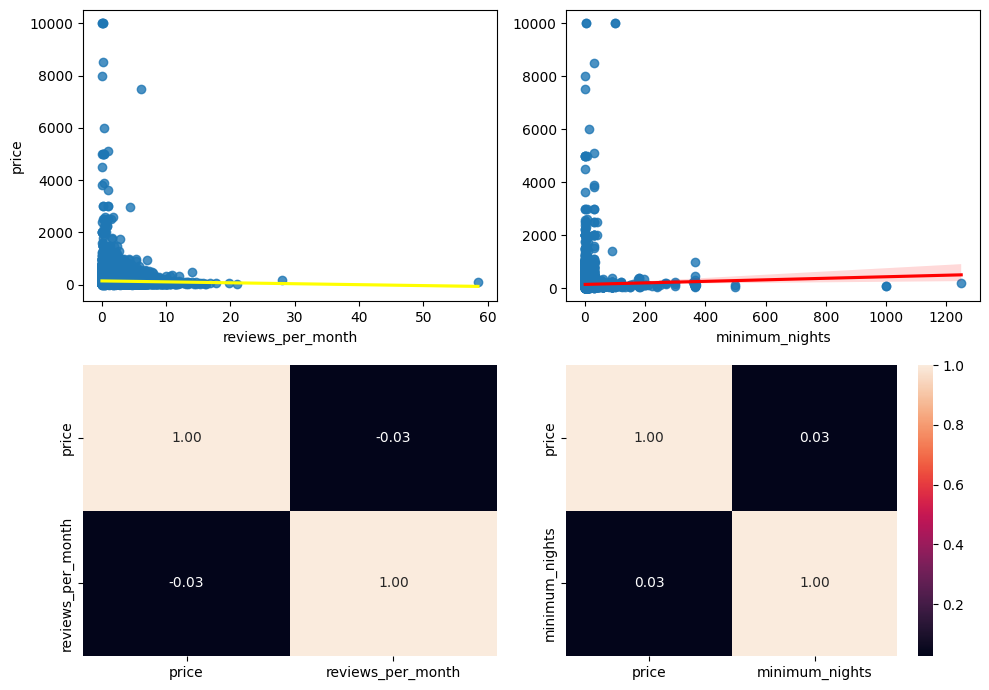

In [113]:
corr_price_reviews = df[['price', 'reviews_per_month']].corr()
corr_price_minimum_nights = df[['price', 'minimum_nights']].corr()

# Crear un diagrama de dispersión múltiple
fig, axis = plt.subplots(2, 2, figsize=(10, 7))

sns.regplot(ax=axis[0, 0], data=df, x='reviews_per_month', y='price', line_kws={'color': 'yellow'})
sns.heatmap(ax=axis[1, 0], data=corr_price_reviews, annot=True, fmt=".2f", cbar=False)

sns.regplot(ax=axis[0, 1], data=df, x='minimum_nights', y='price', line_kws={'color': 'red'}).set(ylabel=None)
sns.heatmap(ax=axis[1, 1], data=corr_price_minimum_nights, annot=True, fmt=".2f")

plt.tight_layout()
plt.show()

**Obvservacion de la correlación**

>- Existe una relacion lineal negativa entre el precio y la cantidad de reviews por mes (Aunque no muy directa).
>- Tambien el precio y el minimo de noches tiene relacion directa (Aunque un poco leve). 

## Observaciones

Se puede determinar que entre menos noches, tiene una relación significativa de reviews a lo largo del mes.

> - Correlación negativa entre precio y reviews por mes. Listings más caros generan menos reviews mensuales
> - Correlación positiva entre precio y noches mínima. Estadías más largas asociadas a precios más altos

/tmp/ipykernel_1456/3491692742.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='neighbourhood_group', palette='rainbow')


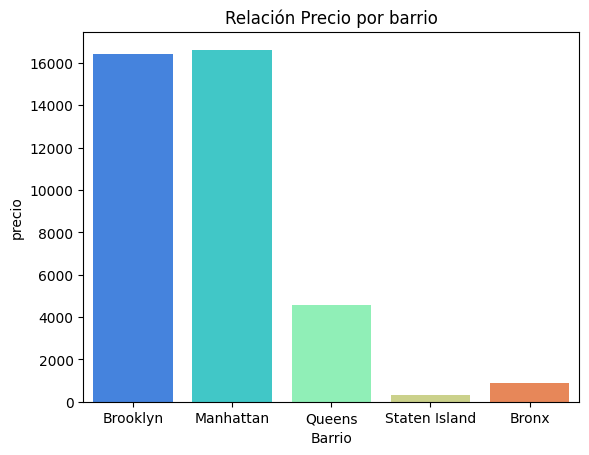

In [114]:
sns.countplot(data=df, x='neighbourhood_group', palette='rainbow')

plt.title('Relación Precio por barrio')
plt.xlabel('Barrio')
plt.ylabel('precio')
plt.show()

In [115]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,38811.000000,38811.000000,38811.000000,38811.000000,38811.000000,38811.000000,38811.000000,38811.000000
mean,40.728134,-73.951157,142.369199,5.868723,29.288088,1.373135,5.166757,114.881631
std,0.054992,0.046695,197.006883,17.390315,48.184653,1.680276,26.306326,129.535406
min,40.506410,-74.244420,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,40.688640,-73.982470,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,40.721710,-73.954810,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,40.762995,-73.935030,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


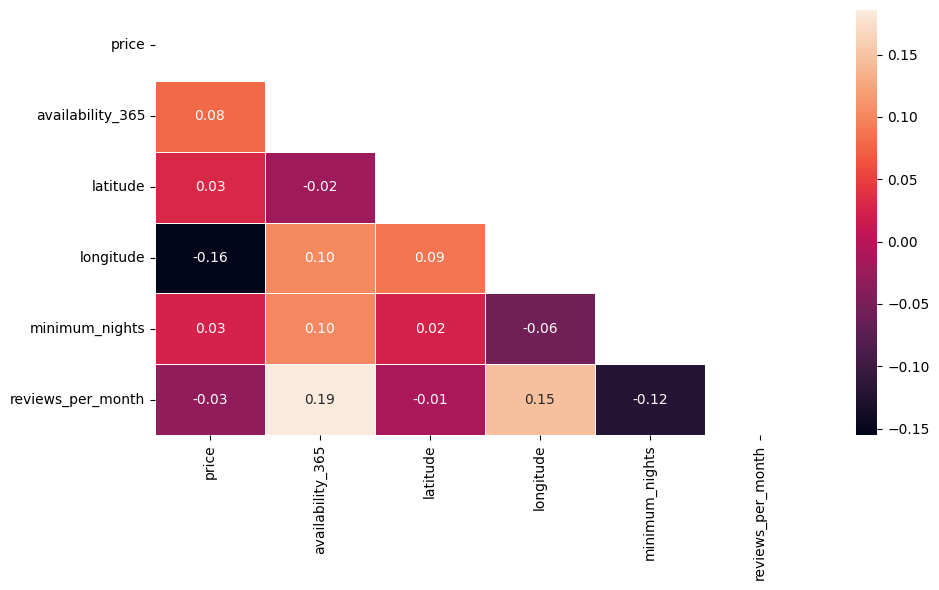

In [116]:
corr = df[['price', 'availability_365', 'latitude', 'longitude', 'minimum_nights', 'reviews_per_month']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, axis = plt.subplots(figsize=(10, 6))
sns.heatmap(corr, mask=mask, annot=True, linewidths=0.5, fmt=".2f")

plt.tight_layout()
plt.show()

## Observaciones

> - Ubicación importa: La longitud geográfica afecta los precios
> - Disponibilidad clave: Listings disponibles más días reciben más reviews
> - Precios mas bajos: Estadías mínimas cortas generan mayor interacción con los clientes
> - Precio vs Interacción: No hay correlación fuerte precio-reviews, lo que sugiere que el precio no determina la satisfacción del cliente

#### Análisis numérico-categórico

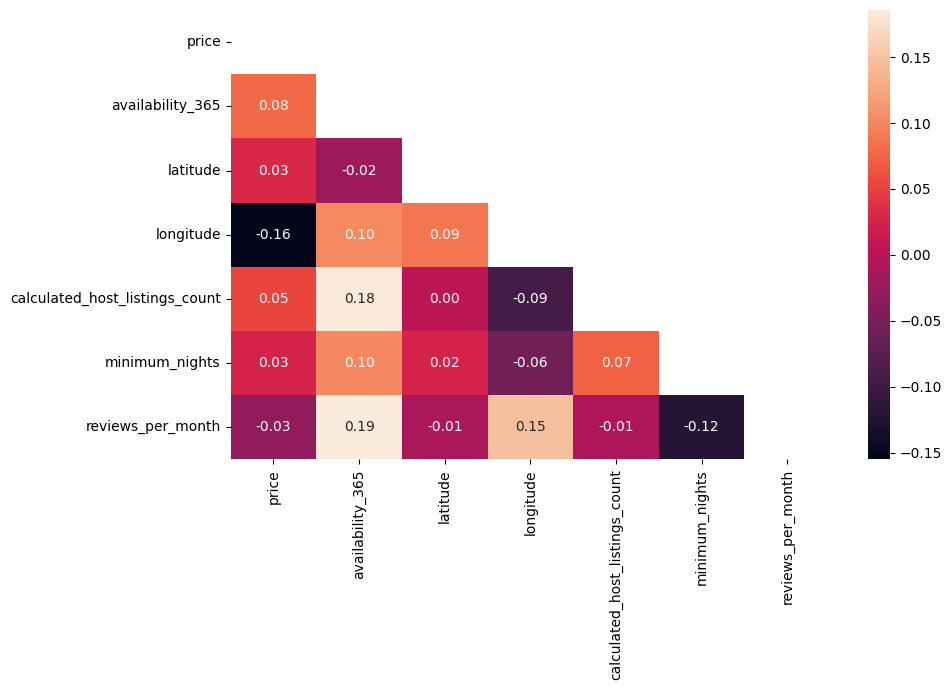

In [122]:
corr = df[['price', 'availability_365', 'latitude', 'longitude', 'calculated_host_listings_count', 'minimum_nights', 'reviews_per_month']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, axis = plt.subplots(figsize=(10, 7))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f")

plt.tight_layout()
plt.show()

## Observaciones 

> - la ubicación geográfica como factor clave
> - Estadías mínimas cortas generan más interacción
> - Mayor disponibilidad tiende a tener más reseñas por lo cual lleva a más visibilidad